1. Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between salary and experience with exerience in x-axis and salary in y axis.

a. Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph between beta and mean squared error(MSE) for each case.

b. Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between 
beta and mean squared error(MSE).

c. Try with different values of intercept for slope beta between 0 to 1.5 with an increment of 0.01. Plot the graph between beta and mean squared error(MSE).

d. Use the scikit learn and compare the results of MSE.

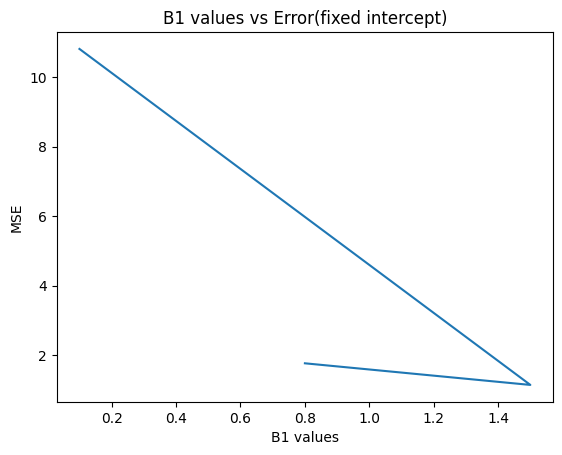

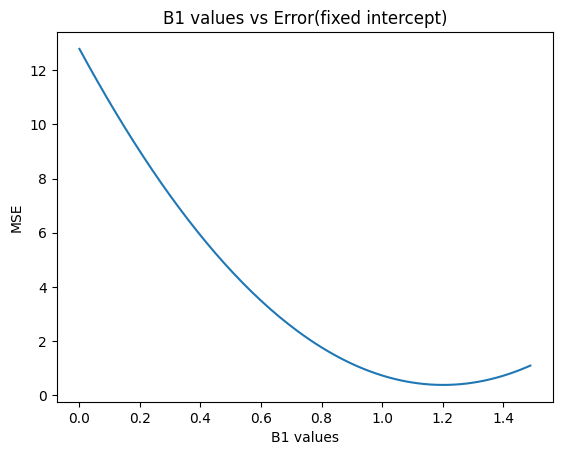

C:\Users\rsurs\AppData\Local\Temp\ipykernel_8652\4082444193.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


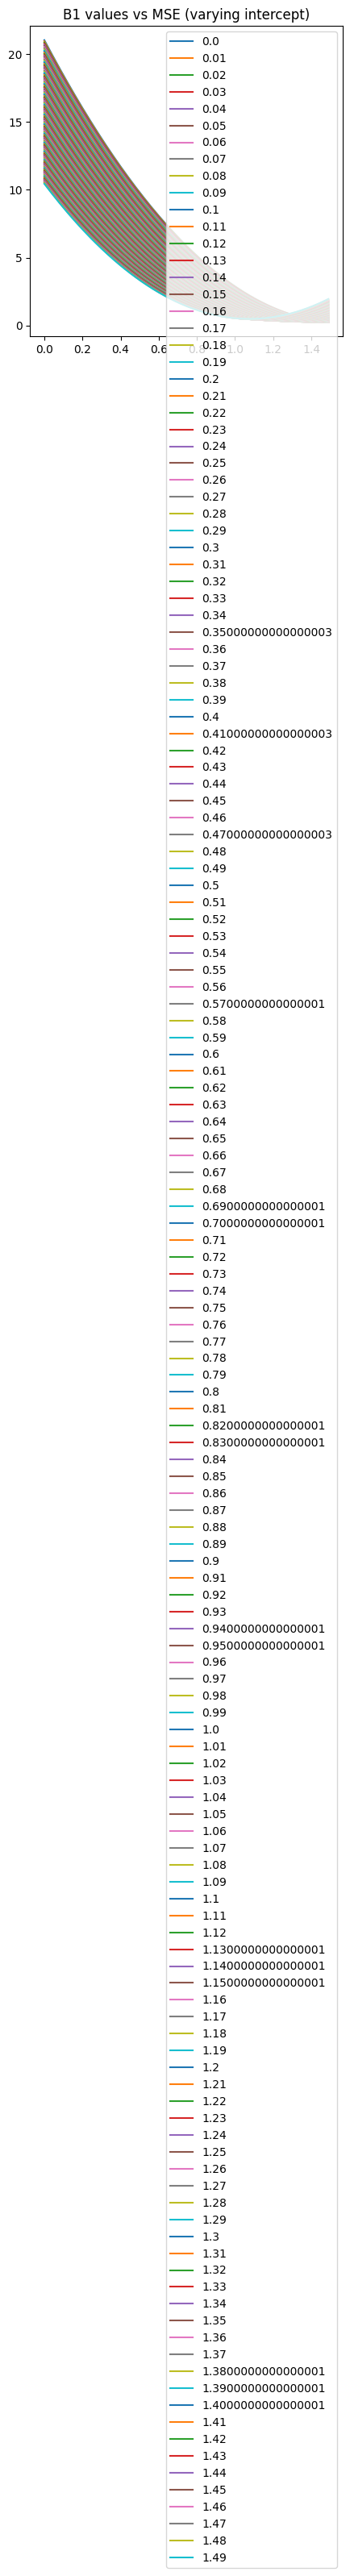

sklearn model: mse:0.23366710810280558
Manual model mse : [1.0899765]


In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv('data.csv')
x,y = df['experience'].values,df['salary'].values

def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0 
    for i in range(m):
        f_wb = (w*x[i]) + b
        cost += (f_wb-y[i])**2
    cost /= m
    return cost
#1a
b1_val = [0.1,1.5,0.8]
b0 = 1.1
mse = []
for b1 in b1_val:
    mse.append(compute_cost(x,y,b1,b0))
plt.plot(b1_val,mse)
plt.title('B1 values vs Error(fixed intercept)')
plt.xlabel('B1 values')
plt.ylabel('MSE')
plt.show()

#1b 
b1_val = np.arange(0,1.5,0.01)
b0 = 1.1
mse = []
for b1 in b1_val:
    mse.append(compute_cost(x,y,b1,b0))
plt.plot(b1_val,mse)
plt.title('B1 values vs Error(fixed intercept)')
plt.xlabel('B1 values')
plt.ylabel('MSE')
plt.show()

#1c
b1_val = np.arange(0,1.5,0.01)
b0_val = np.arange(0,1.5,0.01)
mse_val = []
intercepts = []
for b0 in b0_val:
    mse = []
    for b1 in b1_val:
        mse.append(compute_cost(x,y,b1,b0))
    mse_val.append(mse)
plt.figure(figsize=(5,5))
plt.title('B1 values vs MSE (varying intercept)')
for i,intercept in enumerate(b0_val):
    plt.plot(b1_val,mse_val[i],label=f"{intercept}")
plt.legend()
plt.tight_layout()
plt.show()

#1d 
x,y = x.reshape(-1,1),y.reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
print(f"sklearn model: mse:{mean_squared_error(y,y_pred)}")
b1_val = [0.1,1.5,0.8]
b0 = 1.1
print(f"Manual model mse : {compute_cost(x,y,b1,b0)}")

Apply Stochastic Gradient Descent for the afore-mentioned dataset, and arrive at different values of B0, B1 and error for 60 iterations of 5 epochs.

a. Plot the graph of error versus iteration.

b.Use the scikit learn and arrive at the results of B0, B1 and error, for 60 iterations of 5 epochs.

c. Plot the graph between beta (X-axis) and error (Y-axis) using scikit learn and your approach separately.

Epoch 0/5, Iteration 0/60, Cost:0.6663857959833334
Epoch 0/5, Iteration 1/60, Cost:0.267131022280064
Epoch 0/5, Iteration 2/60, Cost:0.2587269013152234
Epoch 0/5, Iteration 3/60, Cost:0.25798392540012166
Epoch 0/5, Iteration 4/60, Cost:0.2574045568769968
Epoch 0/5, Iteration 5/60, Cost:0.25684177929811014
Epoch 0/5, Iteration 6/60, Cost:0.25629239882571975
Epoch 0/5, Iteration 7/60, Cost:0.25575604307450966
Epoch 0/5, Iteration 8/60, Cost:0.2552324022080587
Epoch 0/5, Iteration 9/60, Cost:0.25472117478600365
Epoch 0/5, Iteration 10/60, Cost:0.25422206653449897
Epoch 0/5, Iteration 11/60, Cost:0.25373479015616535
Epoch 0/5, Iteration 12/60, Cost:0.2532590651643096
Epoch 0/5, Iteration 13/60, Cost:0.2527946177214638
Epoch 0/5, Iteration 14/60, Cost:0.2523411804817585
Epoch 0/5, Iteration 15/60, Cost:0.25189849243703216
Epoch 0/5, Iteration 16/60, Cost:0.2514662987665894
Epoch 0/5, Iteration 17/60, Cost:0.25104435069052106
Epoch 0/5, Iteration 18/60, Cost:0.25063240532650055
Epoch 0/5, It

C:\Users\rsurs\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


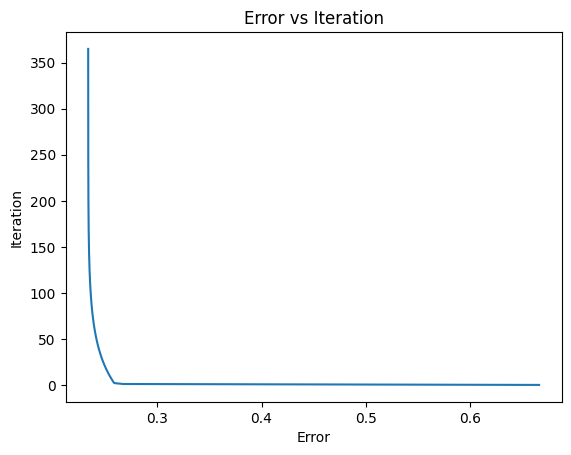

In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv('data.csv')
x,y = df['experience'].values,df['salary'].values

def compute_cost(x,y,w,b):
    cost = 0
    m = x.shape[0]
    for i in range(m):
        f_wb = (x[i]*w)+b
        cost += (f_wb-y[i])**2
    cost  /= m
    return cost 

def compute_gradient(x,y,w,b):
    dj_dw,dj_db = 0,0
    m = x.shape[0]
    for i in range(m):
        f_wb = (x[i]*w) + b        
        dj_dw_i,dj_db_i = (f_wb - y[i])*x[i],(f_wb - y[i]) 
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    return dj_dw,dj_db

def gradient_descent(x,y,w_in,b_in,alpha,iters,epochs):
    w,b = w_in,b_in
    j_hist,p_hist = [],[]
    for epoch in range(epochs+1):
        for i in range(iters+1):
            dj_dw,dj_db = compute_gradient(x,y,w,b)
            w -= alpha*dj_dw
            b -= alpha*dj_db
            j_hist.append(compute_cost(x,y,w,b))
            p_hist.append([w,b])
            print(f"Epoch {epoch}/{epochs}, Iteration {i}/{iters}, Cost:{j_hist[i]}")
    return w,b,j_hist,p_hist

w_in,b_in,alpha,iters,epochs = 0,0,0.01,60,5 
w,b,j_hist,p_hist = gradient_descent(x,y,w_in,b_in,alpha,iters,epochs)
print(f"Updated parameters slope:{w} and intercept:{b} cost:{compute_cost(x,y,w,b)}")
plt.plot(j_hist, range(len(j_hist)))
plt.title('Error vs Iteration')
plt.xlabel('Error')
plt.ylabel('Iteration')

x,y = x.reshape(-1,1),y.reshape(-1,1)
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
print(f"Sklearn model slope:{model.coef_} and intercept:{model.intercept_}\n MSE:{mean_squared_error(y,y_pred)}")

sgd_regressor = SGDRegressor(loss='squared_error',alpha=0.01,max_iter=60)
sgd_regressor.fit(x,y)
y_pred = sgd_regressor.predict(x)
print(f"sklearn after gradient descent\nslope:{sgd_regressor.coef_} intercept:{sgd_regressor.intercept_}")